<a href="https://colab.research.google.com/github/CHANDRU142006/churn-prediction/blob/main/CHANDRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving churn_prediction (1).csv to churn_prediction (1).csv


Load the Dataset

In [ ]:
import pandas as pd

# Replace with your actual filename
df = pd.read_csv('/content/churn_prediction (1).csv')
df.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


 Data Exploration

In [ ]:
# Basic info
df.info()

# Descriptive statistics
df.describe()

# Preview column names
print("Columns:", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

Check for Missing Values and Duplicates
python
Copy
Edit


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())


customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64
Duplicate Rows: 0


Visualize a Few Features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Check if 'Gender' and 'Age' columns exist
if 'Gender' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Gender', palette='Set2')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'Gender' not found in DataFrame.")

if 'Age' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Age'], kde=True, color='skyblue', bins=30)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Age' not found in DataFrame.")


Column 'Gender' not found in DataFrame.
Column 'Age' not found in DataFrame.


Identify Target and Features

In [ ]:
print(df.columns.tolist())

target_column = 'churn'
X = df.drop(target_column, axis=1)
y = df[target_column]
df.head()

NameError: name 'df' is not defined

Convert Categorical Columns to Numerical

In [ ]:
# Identify categorical columns
cat_cols = X.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols.tolist())

# Apply label encoding temporarily (can be replaced with OneHot later)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])


Categorical Columns: []


Convert Categorical Columns to Numerical

In [ ]:
# Identify categorical columns
cat_cols = X.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols.tolist())

# Apply label encoding temporarily (can be replaced with OneHot later)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])


Categorical Columns: []


One-Hot Encoding

In [ ]:
X = pd.get_dummies(X, drop_first=True)


 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 Evaluation

Accuracy: 0.8568192115994563
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3544
           1       0.73      0.44      0.55       870

    accuracy                           0.86      4414
   macro avg       0.80      0.70      0.73      4414
weighted avg       0.85      0.86      0.84      4414



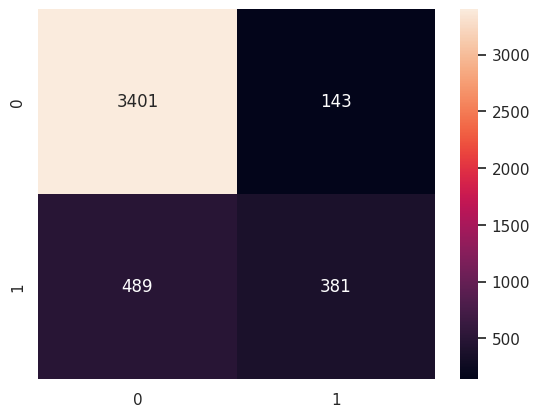

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


Make Predictions from New Input
python
Copy
Edit


In [ ]:
print(X.columns.tolist())

import pandas as pd

# Create a dictionary that includes all columns from training
new_input_dict = {
    'Age': 35,
    'Gender_Male': 1,
    'Gender_Female': 0,
    'Plan_Basic': 0,
    'Plan_Premium': 1,
    'MonthlyCharges': 5000,
    # ... include all other one-hot encoded or numeric features, set missing to 0
}

# Convert to DataFrame
new_input_df = pd.DataFrame([new_input_dict])

# Reindex to match training column order
new_input_df = new_input_df.reindex(columns=X.columns, fill_value=0)

# Scale
new_input_scaled = scaler.transform(new_input_df)

# Predict
prediction = model.predict(new_input_scaled)
print("Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")



['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation', 'city', 'customer_nw_category', 'branch_code', 'days_since_last_transaction', 'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance']
Prediction: Churn


Convert to DataFrame and Encode (for prediction input)

In [ ]:
input_dict = {
    'Age': [35],
    'Gender': ['Male'],
    'Plan': ['Basic'],
    # Add more fields as per your original dataset
}

input_df = pd.DataFrame(input_dict)

# Convert categorical variables
for col in input_df.select_dtypes(include='object'):
    input_df[col] = le.fit_transform(input_df[col])

# Align columns
input_df = pd.get_dummies(input_df)
input_df = input_df.reindex(columns=X.columns, fill_value=0)

input_scaled = scaler.transform(input_df)


Predict the Final Grade

In [ ]:
final_prediction = model.predict(input_scaled)
print("Final Prediction:", final_prediction)


Final Prediction: [1]


Deployment - Building an Interactive App


In [ ]:
# Simulate form input in Colab
user_input = pd.DataFrame({
    'Age': [30],
    'Gender': ['Male'],
    'Plan': ['Premium'],
    # Add other features...
})

# Encode, align, scale
for col in user_input.select_dtypes(include='object'):
    user_input[col] = le.fit_transform(user_input[col])\


user_input = pd.get_dummies(user_input)
user_input = user_input.reindex(columns=X.columns, fill_value=0)

user_input_scaled = scaler.transform(user_input)
prediction = model.predict(user_input_scaled)

print("Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")



Prediction: Churn


 Create a Prediction Function

In [ ]:
def preprocess_input(input_data, scaler, encoder, base_columns):
    """
    Preprocess input data: encode, one-hot, scale, and align columns.

    Args:
    - input_data (pd.DataFrame): Raw input data.
    - scaler (StandardScaler): Fitted scaler.
    - encoder (LabelEncoder): Fitted label encoder for categorical vars.
    - base_columns (list): List of original X.columns after one-hot.

    Returns:
    - np.array: Scaled and aligned feature vector.
    """
    data = input_data.copy()

    for col in data.select_dtypes(include='object').columns:
        data[col] = encoder.fit_transform(data[col])

    data = pd.get_dummies(data)
    data = data.reindex(columns=base_columns, fill_value=0)
    data_scaled = scaler.transform(data)

    return data_scaled

def predict_churn(input_dict, model, scaler, encoder, base_columns):
    """
    Make churn prediction from raw input dictionary.

    Args:
    - input_dict (dict): User inputs as key-value pairs.
    - model (trained model): Trained classifier.
    - scaler (StandardScaler): Trained scaler.
    - encoder (LabelEncoder): Trained label encoder.
    - base_columns (list): Reference for column alignment.

    Returns:
    - str: Prediction result.
    """
    input_df = pd.DataFrame([input_dict])
    processed = preprocess_input(input_df, scaler, encoder, base_columns)
    prediction = model.predict(processed)[0]
    return "Churn" if prediction == 1 else "Not Churn"


create the gradio interface

In [ ]:
!pip install -q gradio
import gradio as gr

def predict_churn(age, gender, plan, monthly_charges):
    # Create input DataFrame
    input_dict = {
        'Age': [age],
        'Gender': [gender],
        'Plan': [plan],
        'MonthlyCharges': [monthly_charges]
    }
    input_df = pd.DataFrame(input_dict)

    # Encode
    for col in input_df.select_dtypes(include='object'):
        input_df[col] = le.fit_transform(input_df[col])

    # One-hot encoding (if needed)
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=column_names, fill_value=0)

    # Scale
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]
    return "Churn" if prediction == 1 else "Not Churn"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
iface = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(choices=["Male", "Female"], label="Gender"),
        gr.Dropdown(choices=["Basic", "Premium", "Gold"], label="Plan"),
        gr.Number(label="Monthly Charges")
    ],
    outputs="text",
    title="Churn Prediction App",
    description="Enter details to predict if a customer will churn."
)

iface.launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f18e1a1fbb58209920.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
def predict_churn(age, gender, plan, monthly_charges):
    # Your logic here
    ...
    return ...
import gradio as gr

iface = gr.Interface(fn=predict_churn,inputs=[...],outputs="text")
iface.launch()


ValueError: Component must be provided as a `str` or `dict` or `Component` but is Ellipsis